컴퓨터공학과 16101414 조용진

In [148]:
import pandas as pd
import os
import matplotlib.pyplot as plt


columns = ["age", "workClass", "fnlwgt", "education", "education-num","marital-status", "occupation", "relationship",
          "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
train_data = pd.read_csv('data/adult.data', names=columns, 
             sep=' *, *', na_values='?')
test_data  = pd.read_csv('data/adult.test', names=columns, 
             sep=' *, *', skiprows=1, na_values='?')

<ipython-input-148-6173803f6b15>:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv('data/adult.data', names=columns,
<ipython-input-148-6173803f6b15>:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data  = pd.read_csv('data/adult.test', names=columns,


In [149]:
train_data.head()

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [150]:
test_data.head()

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [151]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workClass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- 32561개의 훈련데이터세트
- workClass, opccuptation, native-country 에 결측치가 있음

In [152]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workClass       15318 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      15315 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16007 non-null  object
 14  income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


- 16281개의 데이터
- 결측치 workClass, occupation, native-country

## -Descriptive statistics 기술통계

In [153]:
train_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [154]:
num_attributes = train_data.select_dtypes(include=['int64'])
print(num_attributes.columns)

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


In [155]:
cat_attributes = train_data.select_dtypes(include=['object'])
print(cat_attributes.columns)

Index(['workClass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')


## -Univariate analysis (frequency table, histogram, boxplot, etc.) 단변량분석 (빈도테이블, 히스토그램, 박스플랏)

### 양적변수

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education-num'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

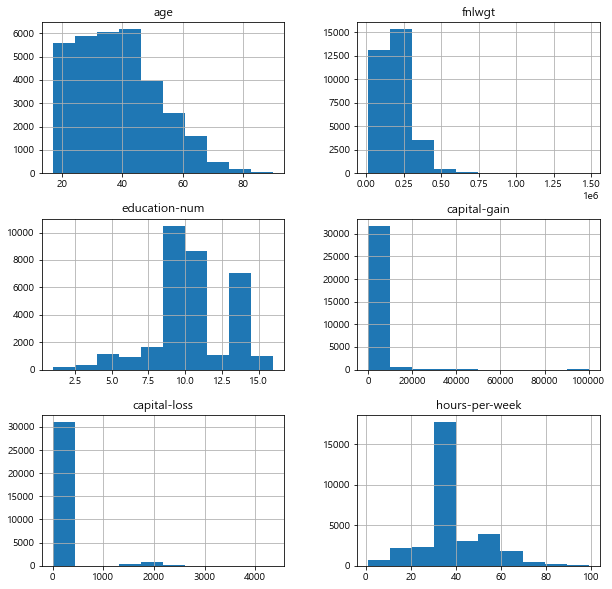

In [156]:
num_attributes.hist(figsize=(10,10))

### 범주형데이터

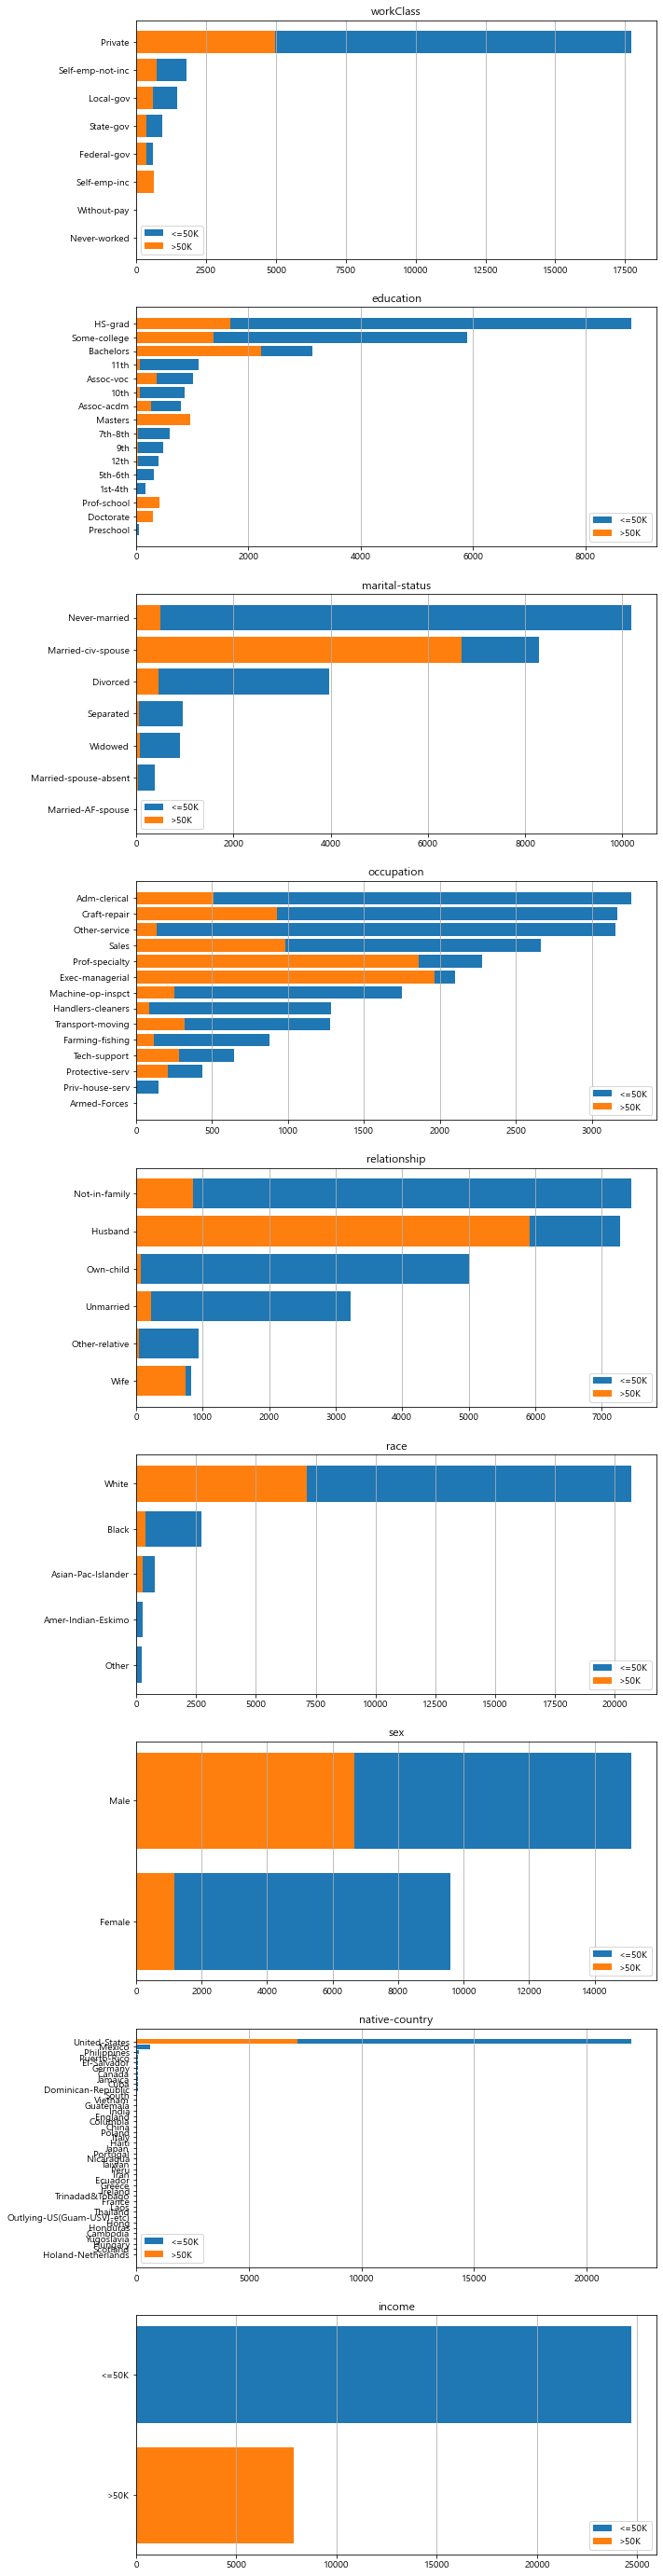

In [158]:
col_list = cat_attributes.columns
i = 1
plt.figure(figsize=(10,50))
for idx in col_list:
    plt.subplot(len(col_list),1, i)
    plt.barh(train_data[train_data['income'].str.contains('<=50K')][idx].value_counts().index,width = train_data[train_data['income'].str.contains('<=50K')][idx].value_counts().values, label='<=50K', )
    plt.barh(train_data[train_data['income'].str.contains('>50K')][idx].value_counts().index,width = train_data[train_data['income'].str.contains('>50K')][idx].value_counts().values, label = '>50K')
    plt.grid(axis='x')
    plt.legend()
    plt.gca().invert_yaxis()
    plt.title(idx)
    i+=1
plt.show()

### 빈도테이블

In [11]:
col_list = cat_attributes.columns
print('빈도테이블')
for col in col_list:
    freq = train_data[col].value_counts()
    r_freq = train_data[col].value_counts()/len(train_data)
    p_freq = r_freq*100

    freq_table = pd.DataFrame({
        'freq' :freq,
        'r_freq' : r_freq,
        'p_freq' : p_freq
    })
    print("===============================================")
    print(col+ '_freq_table')
    print(freq_table)
    print("===============================================\n")

빈도테이블
workClass_freq_table
                   freq    r_freq     p_freq
Private           22696  0.697030  69.703019
Self-emp-not-inc   2541  0.078038   7.803814
Local-gov          2093  0.064279   6.427935
State-gov          1298  0.039864   3.986364
Self-emp-inc       1116  0.034274   3.427413
Federal-gov         960  0.029483   2.948312
Without-pay          14  0.000430   0.042996
Never-worked          7  0.000215   0.021498

education_freq_table
               freq    r_freq     p_freq
HS-grad       10501  0.322502  32.250238
Some-college   7291  0.223918  22.391818
Bachelors      5355  0.164461  16.446055
Masters        1723  0.052916   5.291607
Assoc-voc      1382  0.042443   4.244341
11th           1175  0.036086   3.608612
Assoc-acdm     1067  0.032769   3.276926
10th            933  0.028654   2.865391
7th-8th         646  0.019840   1.983969
Prof-school     576  0.017690   1.768987
9th             514  0.015786   1.578576
12th            433  0.013298   1.329812
Doctorate    

### income에 따른 빈도수

In [12]:
col_list = cat_attributes.columns
for idx in col_list:
    print("===========================================")
    print(pd.crosstab(train_data[idx], train_data['income']))
    print("===========================================\n")

income            <=50K  >50K
workClass                    
Federal-gov         589   371
Local-gov          1476   617
Never-worked          7     0
Private           17733  4963
Self-emp-inc        494   622
Self-emp-not-inc   1817   724
State-gov           945   353
Without-pay          14     0

income        <=50K  >50K
education                
10th            871    62
11th           1115    60
12th            400    33
1st-4th         162     6
5th-6th         317    16
7th-8th         606    40
9th             487    27
Assoc-acdm      802   265
Assoc-voc      1021   361
Bachelors      3134  2221
Doctorate       107   306
HS-grad        8826  1675
Masters         764   959
Preschool        51     0
Prof-school     153   423
Some-college   5904  1387

income                 <=50K  >50K
marital-status                    
Divorced                3980   463
Married-AF-spouse         13    10
Married-civ-spouse      8284  6692
Married-spouse-absent    384    34
Never-married       

## -Multivariate analysis (correlation matrix, scatter plot, etc.) 다변량분석 (상관관계, 산점도등)

In [13]:
train_data.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


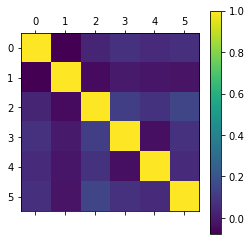

In [14]:
plt.matshow(train_data.corr())
plt.colorbar()
plt.show()

대부분의 상관관계가 낮게 나왔다. 그중 가장 높은 2가지 hours-per-week와 education-num, capital-gain과 education-num의 산점도를 그려보았다

Text(0, 0.5, 'education-num')

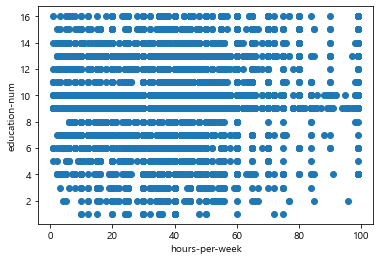

In [97]:
plt.scatter(train_data['hours-per-week'], train_data['education-num'])
plt.xlabel('hours-per-week')
plt.ylabel('education-num')

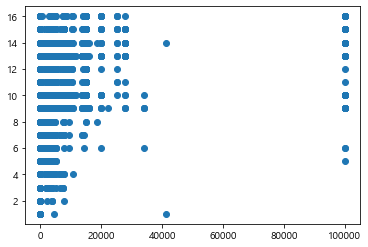

In [98]:
plt.scatter(train_data['capital-gain'], train_data['education-num'])

# Model building, analysis, or predictions 모델개발, 분석, 예측

## 모델학습 1

### train, test 데이터 분할

In [17]:
columns = ["age", "workClass", "fnlwgt", "education", "education-num","marital-status", "occupation", "relationship",
          "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
train_data = pd.read_csv('data/adult.data', names=columns)
test_data  = pd.read_csv('data/adult.test', names=columns)

In [18]:
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split

col=num_attributes.columns


X = train_data[col] 
y = train_data.iloc[:, -1]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True, random_state=1004)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (19536, 6)
X_test shape: (13025, 6)
y_train shape: (19536,)
y_test shape: (13025,)


In [20]:
import numpy as np

In [21]:
X_train

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
30339,50,175804,13,0,0,40
25055,45,194698,10,0,0,40
29016,44,357814,8,0,0,35
23570,47,228372,14,0,0,48
25514,55,217802,10,0,0,25
...,...,...,...,...,...,...
9455,23,274797,9,0,0,25
13637,31,31740,11,0,0,55
20511,36,41624,6,0,0,70
10763,28,126129,10,0,0,40


In [22]:
y_train

30339      >50K
25055      >50K
29016     <=50K
23570      >50K
25514     <=50K
          ...  
9455      <=50K
13637     <=50K
20511     <=50K
10763     <=50K
15362     <=50K
Name: income, Length: 19536, dtype: object

In [23]:
X_test

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
8568,45,377757,5,0,0,40
28750,19,369463,9,0,0,40
2971,36,131239,13,3103,0,45
11557,23,123490,7,0,0,35
4655,19,124884,5,0,0,25
...,...,...,...,...,...,...
19202,46,99086,10,0,0,40
13560,40,143046,13,0,0,45
22216,45,54260,10,0,0,99
21375,25,306908,13,0,0,45


In [24]:
y_test

8568      <=50K
28750     <=50K
2971       >50K
11557     <=50K
4655      <=50K
          ...  
19202      >50K
13560     <=50K
22216     <=50K
21375      >50K
8238      <=50K
Name: income, Length: 13025, dtype: object

### 결정트리

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
print("훈련 세트 정확도 :{:.3f}".format(dtc.score(X_train, y_train)))
print("테스트 세트 정확도 :{:.3f}".format(dtc.score(X_test, y_test)))

훈련 세트 정확도 :0.999
테스트 세트 정확도 :0.770


In [26]:
dtc = DecisionTreeClassifier(random_state=0,max_depth = 4)
dtc.fit(X_train, y_train)
print("훈련 세트 정확도 :{:.3f}".format(dtc.score(X_train, y_train)))
print("테스트 세트 정확도 :{:.3f}".format(dtc.score(X_test, y_test)))

훈련 세트 정확도 :0.820
테스트 세트 정확도 :0.816


### 랜덤포레스트

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
print("훈련 세트 정확도 :{:.3f}".format(rfc.score(X_train, y_train)))
print("테스트 세트 정확도 :{:.3f}".format(rfc.score(X_test, y_test)))

훈련 세트 정확도 :0.999
테스트 세트 정확도 :0.810


In [28]:
rfc = RandomForestClassifier(random_state=0, n_estimators = 4
                            )
rfc.fit(X_train, y_train)
print("훈련 세트 정확도 :{:.3f}".format(rfc.score(X_train, y_train)))
print("테스트 세트 정확도 :{:.3f}".format(rfc.score(X_test, y_test)))

훈련 세트 정확도 :0.951
테스트 세트 정확도 :0.807


### LDA

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print("훈련 세트 정확도 :{:.3f}".format(lda.score(X_train, y_train)))
print("테스트 세트 정확도 :{:.3f}".format(lda.score(X_test, y_test)))

훈련 세트 정확도 :0.804
테스트 세트 정확도 :0.800


### KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("훈련 세트 정확도 :{:.3f}".format(knn.score(X_train, y_train)))
print("테스트 세트 정확도 :{:.3f}".format(knn.score(X_test, y_test)))

훈련 세트 정확도 :0.834
테스트 세트 정확도 :0.767


### SVM

In [31]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print("훈련 세트 정확도 :{:.3f}".format(svm.score(X_train, y_train)))
print("테스트 세트 정확도 :{:.3f}".format(svm.score(X_test, y_test)))

훈련 세트 정확도 :0.794
테스트 세트 정확도 :0.792


### 검증

In [32]:
from sklearn.model_selection import cross_val_score
dtc_score1 = cross_val_score(dtc, X_train, y_train, cv=10, scoring= 'accuracy')
rfc_score1 =cross_val_score(rfc, X_train, y_train, cv=10, scoring= 'accuracy')
lda_score1 = cross_val_score(lda, X_train, y_train, cv=10, scoring= 'accuracy')
knn_score1 =cross_val_score(knn, X_train, y_train, cv=10, scoring= 'accuracy')
svm_score1 = cross_val_score(svm, X_train, y_train, cv=10, scoring= 'accuracy')

In [33]:
score1 = pd.DataFrame({
    'lda_score_1' : lda_score1, 'dtc_score_1': dtc_score1, 'rfc_score_1': rfc_score1, 'knn_score_1' : knn_score1, 'svm_score_1' :svm_score1})

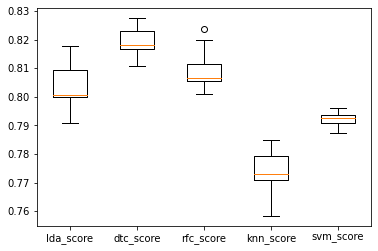

In [34]:
plt.boxplot([lda_score1, dtc_score1, rfc_score1, knn_score1, svm_score1])
plt.xticks([1,2,3,4,5],['lda_score', 'dtc_score', 'rfc_score', 'knn_score', 'svm_score'])
plt.show()

## 원핫인코딩 후 데이터마이닝

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
X1 = train_data.copy()

### 원핫코딩

In [37]:
dp_df = train_data.drop(['age','fnlwgt', 'education-num','capital-gain', 'capital-loss', 'hours-per-week', 'income'], axis=1)
X = pd.concat([train_data[['age','fnlwgt', 'education-num','capital-gain', 'capital-loss', 'hours-per-week']], pd.get_dummies(dp_df)], axis=1)

### 데이터 분할

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True, random_state=1004)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (19536, 108)
X_test shape: (13025, 108)
y_train shape: (19536,)
y_test shape: (13025,)


### 결정트리

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
print("훈련 세트 정확도 :{:.3f}".format(dtc.score(X_train, y_train)))
print("테스트 세트 정확도 :{:.3f}".format(dtc.score(X_test, y_test)))

훈련 세트 정확도 :1.000
테스트 세트 정확도 :0.817


In [40]:
dtc = DecisionTreeClassifier(random_state=0,max_depth = 5)
dtc.fit(X_train, y_train)
print("훈련 세트 정확도 :{:.3f}".format(dtc.score(X_train, y_train)))
print("테스트 세트 정확도 :{:.3f}".format(dtc.score(X_test, y_test)))

훈련 세트 정확도 :0.855
테스트 세트 정확도 :0.852


### 랜덤포레스트

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
print("훈련 세트 정확도 :{:.3f}".format(rfc.score(X_train, y_train)))
print("테스트 세트 정확도 :{:.3f}".format(rfc.score(X_test, y_test)))

훈련 세트 정확도 :1.000
테스트 세트 정확도 :0.857


In [42]:
rfc = RandomForestClassifier(random_state=0, n_estimators =4)
rfc.fit(X_train, y_train)
print("훈련 세트 정확도 :{:.3f}".format(rfc.score(X_train, y_train)))
print("테스트 세트 정확도 :{:.3f}".format(rfc.score(X_test, y_test)))

훈련 세트 정확도 :0.962
테스트 세트 정확도 :0.834


### LDA

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print("훈련 세트 정확도 :{:.3f}".format(lda.score(X_train, y_train)))
print("테스트 세트 정확도 :{:.3f}".format(lda.score(X_test, y_test)))

훈련 세트 정확도 :0.844
테스트 세트 정확도 :0.838


### KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("훈련 세트 정확도 :{:.3f}".format(knn.score(X_train, y_train)))
print("테스트 세트 정확도 :{:.3f}".format(knn.score(X_test, y_test)))

훈련 세트 정확도 :0.834
테스트 세트 정확도 :0.768


### SVM

In [45]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print("훈련 세트 정확도 :{:.3f}".format(svm.score(X_train, y_train)))
print("테스트 세트 정확도 :{:.3f}".format(svm.score(X_test, y_test)))

훈련 세트 정확도 :0.792
테스트 세트 정확도 :0.791


### 데이터 검증

In [46]:
from sklearn.model_selection import cross_val_score
dtc_score2 = cross_val_score(dtc, X_train, y_train, cv=5, scoring= 'accuracy')
rfc_score2 =cross_val_score(rfc, X_train, y_train, cv=5, scoring= 'accuracy')
lda_score2 = cross_val_score(lda, X_train, y_train, cv=5, scoring= 'accuracy')
knn_score2 =cross_val_score(knn, X_train, y_train, cv=5, scoring= 'accuracy')
svm_score2 = cross_val_score(svm, X_train, y_train, cv=5, scoring= 'accuracy')

In [47]:
import pickle
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
score2 = pd.DataFrame({
    'lda_score_2' : lda_score2, 'dtc_score_2': dtc_score2, 'rfc_score_2': rfc_score2, 'knn_score_2' : knn_score2, 'svm_score_2' :svm_score2})

<AxesSubplot:>

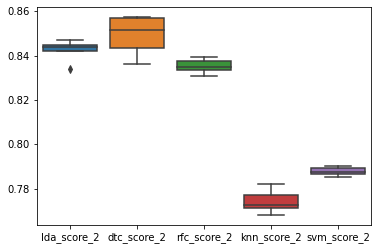

In [49]:
sns.boxplot(data = score2)

## MinMaxScaling 진행후 MIN+ONEHOT

분류보다 회귀에 유용
데이터를 0~1 사이에 위치하도록함.

In [50]:
from sklearn.preprocessing import MinMaxScaler
columns = ["age", "workClass", "fnlwgt", "education", "education-num","marital-status", "occupation", "relationship",
          "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
scaler = MinMaxScaler()
X[['age', 'fnlwgt', 'education-num', 'cg', 'c', 'hw']] = scaler.fit_transform(X[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']])

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True, random_state=1004)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (19536, 111)
X_test shape: (13025, 111)
y_train shape: (19536,)
y_test shape: (13025,)


### 결정트리

In [52]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
print("훈련 세트 정확도 :{:.3f}".format(dtc.score(X_train, y_train)))
print("테스트 세트 정확도 :{:.3f}".format(dtc.score(X_test, y_test)))

훈련 세트 정확도 :1.000
테스트 세트 정확도 :0.814


In [53]:
dtc = DecisionTreeClassifier(random_state=0,max_depth = 5)
dtc.fit(X_train, y_train)
print("훈련 세트 정확도 :{:.3f}".format(dtc.score(X_train, y_train)))
print("테스트 세트 정확도 :{:.3f}".format(dtc.score(X_test, y_test)))

훈련 세트 정확도 :0.855
테스트 세트 정확도 :0.852


### 랜덤포레스트

In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
print("훈련 세트 정확도 :{:.3f}".format(rfc.score(X_train, y_train)))
print("테스트 세트 정확도 :{:.3f}".format(rfc.score(X_test, y_test)))

훈련 세트 정확도 :1.000
테스트 세트 정확도 :0.858


In [55]:
rfc = RandomForestClassifier(random_state=0, n_estimators =4)
rfc.fit(X_train, y_train)
print("훈련 세트 정확도 :{:.3f}".format(rfc.score(X_train, y_train)))
print("테스트 세트 정확도 :{:.3f}".format(rfc.score(X_test, y_test)))

훈련 세트 정확도 :0.963
테스트 세트 정확도 :0.838


### LDA

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print("훈련 세트 정확도 :{:.3f}".format(lda.score(X_train, y_train)))
print("테스트 세트 정확도 :{:.3f}".format(lda.score(X_test, y_test)))

훈련 세트 정확도 :0.844
테스트 세트 정확도 :0.838


### KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("훈련 세트 정확도 :{:.3f}".format(knn.score(X_train, y_train)))
print("테스트 세트 정확도 :{:.3f}".format(knn.score(X_test, y_test)))

훈련 세트 정확도 :0.897
테스트 세트 정확도 :0.852


### SVM

In [58]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print("훈련 세트 정확도 :{:.3f}".format(svm.score(X_train, y_train)))
print("테스트 세트 정확도 :{:.3f}".format(svm.score(X_test, y_test)))

훈련 세트 정확도 :0.803
테스트 세트 정확도 :0.802


In [59]:
from sklearn.model_selection import cross_val_score
dtc_score3 = cross_val_score(dtc, X_train, y_train, cv=5, scoring= 'accuracy')
rfc_score3 =cross_val_score(rfc, X_train, y_train, cv=5, scoring= 'accuracy')
lda_score3 = cross_val_score(lda, X_train, y_train, cv=5, scoring= 'accuracy')
knn_score3 =cross_val_score(knn, X_train, y_train, cv=5, scoring= 'accuracy')
svm_score3 = cross_val_score(svm, X_train, y_train, cv=5, scoring= 'accuracy')

In [60]:
score3 = pd.DataFrame({
    'lda_score_2' : lda_score3, 'dtc_score_3': dtc_score3, 'rfc_score_3': rfc_score3, 'knn_score_3' : knn_score3, 'svm_score_3' :svm_score3})

<AxesSubplot:>

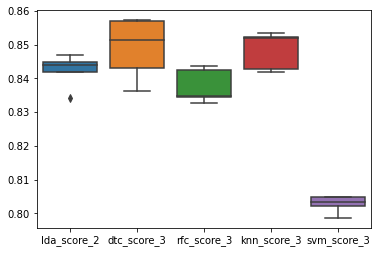

In [61]:
sns.boxplot(data = score3)

## StandardScaler + OneHocoding

In [62]:
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split

col=num_attributes.columns


X = train_data[col] 
y = train_data.iloc[:, -1]

In [63]:
dp_df = train_data.drop(['age','fnlwgt', 'education-num','capital-gain', 'capital-loss', 'hours-per-week', 'income'], axis=1)
X = pd.concat([train_data[['age','fnlwgt', 'education-num','capital-gain', 'capital-loss', 'hours-per-week']], pd.get_dummies(dp_df)], axis=1)

In [64]:
from sklearn.preprocessing import StandardScaler

X[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]= StandardScaler().fit_transform(X[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']])

X

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workClass_ ?,workClass_ Federal-gov,workClass_ Local-gov,workClass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True, random_state=1004)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (19536, 108)
X_test shape: (13025, 108)
y_train shape: (19536,)
y_test shape: (13025,)


### 결정트리

In [66]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
print("훈련 세트 정확도 :{:.3f}".format(dtc.score(X_train, y_train)))
print("테스트 세트 정확도 :{:.3f}".format(dtc.score(X_test, y_test)))

훈련 세트 정확도 :1.000
테스트 세트 정확도 :0.817


In [67]:
dtc = DecisionTreeClassifier(random_state=0,max_depth = 5)
dtc.fit(X_train, y_train)
print("훈련 세트 정확도 :{:.3f}".format(dtc.score(X_train, y_train)))
print("테스트 세트 정확도 :{:.3f}".format(dtc.score(X_test, y_test)))

훈련 세트 정확도 :0.855
테스트 세트 정확도 :0.852


### 랜덤포레스트

In [68]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
print("훈련 세트 정확도 :{:.3f}".format(rfc.score(X_train, y_train)))
print("테스트 세트 정확도 :{:.3f}".format(rfc.score(X_test, y_test)))

훈련 세트 정확도 :1.000
테스트 세트 정확도 :0.857


In [69]:
rfc = RandomForestClassifier(random_state=0, n_estimators =4)
rfc.fit(X_train, y_train)
print("훈련 세트 정확도 :{:.3f}".format(rfc.score(X_train, y_train)))
print("테스트 세트 정확도 :{:.3f}".format(rfc.score(X_test, y_test)))

훈련 세트 정확도 :0.962
테스트 세트 정확도 :0.834


### LDA

In [70]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print("훈련 세트 정확도 :{:.3f}".format(lda.score(X_train, y_train)))
print("테스트 세트 정확도 :{:.3f}".format(lda.score(X_test, y_test)))

훈련 세트 정확도 :0.844
테스트 세트 정확도 :0.838


### KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("훈련 세트 정확도 :{:.3f}".format(knn.score(X_train, y_train)))
print("테스트 세트 정확도 :{:.3f}".format(knn.score(X_test, y_test)))

훈련 세트 정확도 :0.880
테스트 세트 정확도 :0.835


### SVC

In [72]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print("훈련 세트 정확도 :{:.3f}".format(svm.score(X_train, y_train)))
print("테스트 세트 정확도 :{:.3f}".format(svm.score(X_test, y_test)))

훈련 세트 정확도 :0.867
테스트 세트 정확도 :0.856


### 검증

In [73]:
from sklearn.model_selection import cross_val_score
dtc_score4 = cross_val_score(dtc, X_train, y_train, cv=5, scoring= 'accuracy')
rfc_score4 =cross_val_score(rfc, X_train, y_train, cv=5, scoring= 'accuracy')
lda_score4 = cross_val_score(lda, X_train, y_train, cv=5, scoring= 'accuracy')
knn_score4 =cross_val_score(knn, X_train, y_train, cv=5, scoring= 'accuracy')
svm_score4 = cross_val_score(svm, X_train, y_train, cv=5, scoring= 'accuracy')

In [74]:
score4 = pd.DataFrame({
    'lda_score_4' : lda_score4, 'dtc_score_4': dtc_score4, 'rfc_score_4': rfc_score4, 'knn_score_4' : knn_score4, 'svm_score_4' :svm_score4})

<AxesSubplot:>

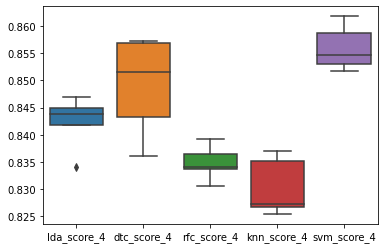

In [75]:
sns.boxplot(data = score4)

### 전체 검증 비교

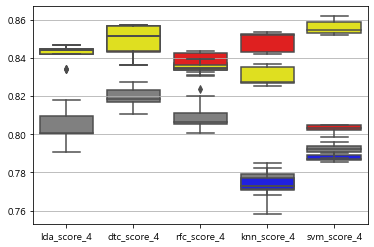

In [163]:
sns.boxplot(data = score1, color='gray', ) # 연속형 데이터만
sns.boxplot(data = score2, color = 'blue') # 원핫코딩 후 모든 데이터
sns.boxplot(data = score3, color = 'red') # 원핫코딩 + minmax 스케일링
sns.boxplot(data = score4, color = 'yellow') # 원핫코딩 + standardscaler
plt.grid(axis='y')


### 원핫코딩 + StandardScaler 한 SVM 모델이 가장 좋은 정확도을 보여줬다.

### 신경망

In [78]:
### %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.utils import *
from sklearn.preprocessing import *
import seaborn as sns

In [79]:
columns = ["age", "workClass", "fnlwgt", "education", "education-num","marital-status", "occupation", "relationship",
          "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
train_data = pd.read_csv('data/adult.data', names=columns)
#test_data  = pd.read_csv('data/adult.test', names=columns)

In [80]:
y_train = train_data['income'].values.tolist()
y_train = [1 if i == ' <=50K' else 0 for i in y_train]
y_train = to_categorical(y_train)

In [81]:
X_train = train_data.drop(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income'], axis=1)
X_train = pd.get_dummies(X_train, drop_first=True)
X_train = pd.concat([X_train, train_data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]], axis=1)

scaler = StandardScaler()
X_train[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']] = scaler.fit_transform(X_train[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']])

In [82]:
X_train = X_train[:-1000]
x_test = X_train[-1000:]

y_train = y_train[:-1000]
y_test = y_train[-1000:]

In [83]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(100,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

hist = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              103424    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
Total params: 694,146
Trainable params: 694,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
789/789 [==============================] - 4s 5ms/step - loss: 0.3780 - acc: 0.8258 - val_loss: 0.3249 - val_acc: 0.8490
Epoch 2/50
789/789 [==============================] - 3s 4ms/step - loss: 0.3189 - acc: 0.8521 - val_loss: 0.3144 - 

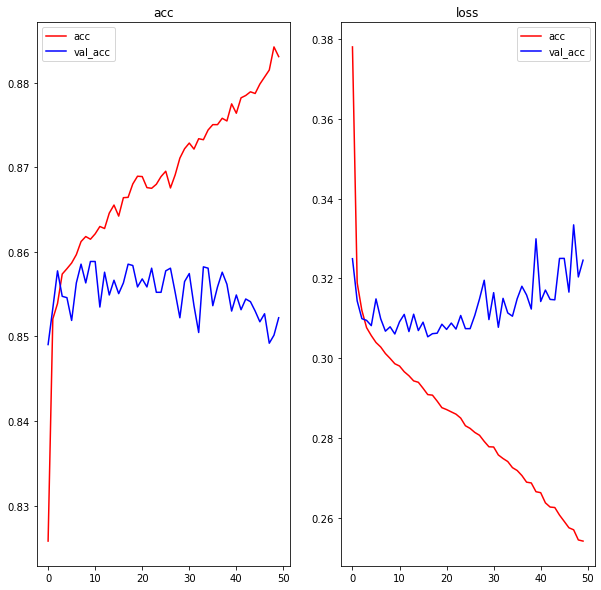

In [84]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)

plt.plot(hist.history['acc'], color='r', label = 'acc')
plt.plot(hist.history['val_acc'], color='b', label = 'val_acc')
plt.title('acc')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['loss'], color='r', label = 'acc')
plt.plot(hist.history['val_loss'], color='b', label = 'val_acc')
plt.title('loss')
plt.legend()

plt.show()

In [85]:
scores = model.evaluate(x_test, y_test)

32/32 [==============================] - 0s 2ms/step - loss: 0.3373 - acc: 0.8510


In [86]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=500) #모델 만들기
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=500)

In [87]:
y_pred = mlp.predict(x_test)
y_pred

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [1, 0],
       [0, 1]])

In [88]:
print(f"훈련 세트 정확도 : {mlp.score(X_train, y_train)}")
print(f"테스트 세트 정확도 : {mlp.score(x_test, y_test)}")

훈련 세트 정확도 : 0.8740851050346947
테스트 세트 정확도 : 0.87


### 가중치 히트맵

C:\Users\tmspr\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tmspr\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


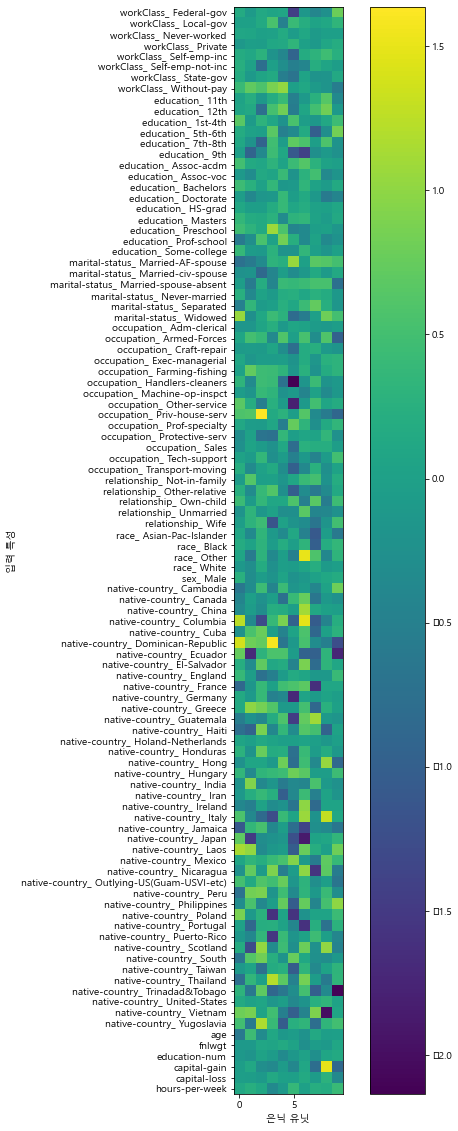

In [89]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.figure(figsize = (10,20))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap = 'viridis')
plt.yticks(range(100), X_train.columns)
plt.xlabel("은닉 유닛")
plt.ylabel("입력 특성")
plt.colorbar()
plt.show()

In [90]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=500) #모델 만들기
mlp.fit(X_train,y_train)

MLPClassifier(max_iter=500)

In [91]:
y_pred = mlp.predict(x_test)
y_pred

array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]])

In [92]:
print(f"훈련 세트 정확도 : {mlp.score(X_train, y_train)}")
print(f"테스트 세트 정확도 : {mlp.score(x_test, y_test)}")

훈련 세트 정확도 : 0.9113779664776148
테스트 세트 정확도 : 0.908


### 가중치 히트맵

C:\Users\tmspr\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tmspr\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


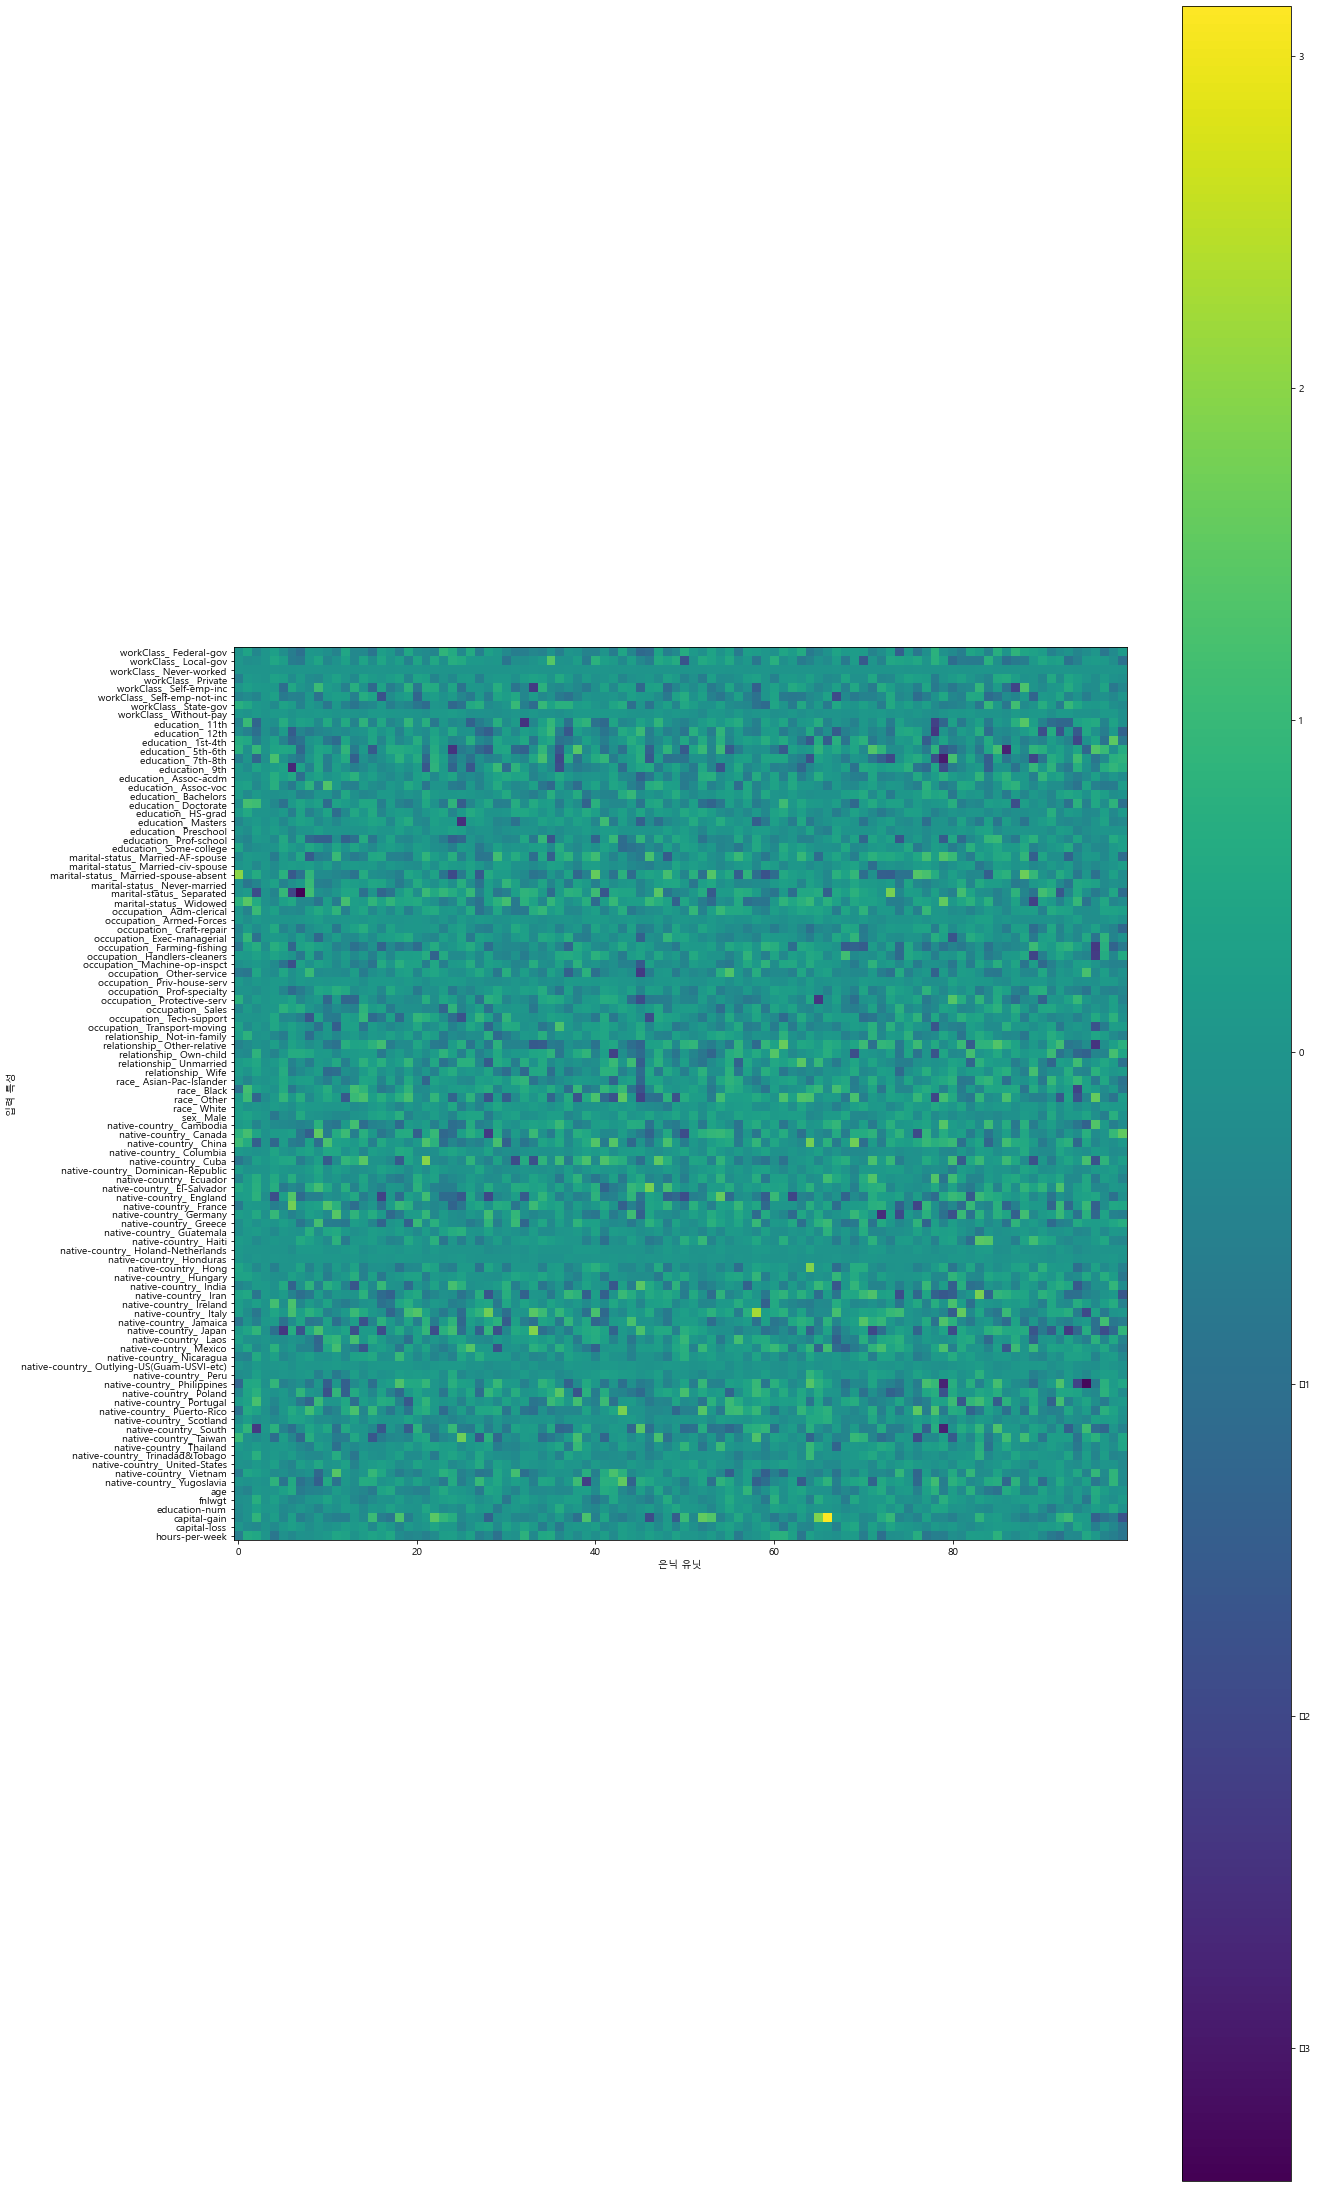

In [93]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.figure(figsize = (20,40))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap = 'viridis')
plt.yticks(range(100), X_train.columns)
plt.xlabel("은닉 유닛")
plt.ylabel("입력 특성")
plt.colorbar()
plt.show()

# Conclusions and decisions 결론 및 의사결정